In [10]:
import os
import cv2
import math
import time
import numpy as np
from scipy.interpolate import spline
import matplotlib
%matplotlib inline
from matplotlib import pylab as plt
from IPython.display import clear_output
from sklearn.decomposition import PCA 
from os.path import join as pj
from tqdm import tqdm_notebook as tqdm
from joblib import Parallel, delayed


In [2]:
filepath_by_idx = {}

ROOT = '/data/junction'
for idx in range(21, 31):
    filenames = []
    for root, dirs, files in os.walk('{}/{}'.format(ROOT, idx)):
        for file in files:
            filenames.append(pj(root, file))
    candidates = [filename for filename in filenames if os.path.splitext(filename)[1] in ['.avi', '.mkv']]
    if len(candidates) != 1:
        print('! {} Shit candidates {} != 1'.format(idx, len(candidates)))
        for filename in filenames:
            print(filename)
    else:
        filepath_by_idx[idx] = candidates[0]

In [3]:
filepath_by_idx

{21: '/data/junction/21/Gorod.Boga.2002.DUAL.BDRip.XviD.AC3.-Shevon/Gorod.Boga.2002.DUAL.BDRip.XviD.AC3.-Shevon.avi',
 22: '/data/junction/22/Se7en.1995.BDRip.AVC.mkv',
 23: '/data/junction/23/Molchanie.yagnyat.1991.BDRip.avi',
 24: '/data/junction/24/Eta_zamechatelnaya_zhizn_OPT.avi',
 25: '/data/junction/25/Zhizn.prekrasna.1997.BDRip.mkv',
 26: '/data/junction/26/Podozritelnye_lica_1995_HDRip__[scarabey.org].avi',
 27: '/data/junction/27/Leon_HDRip_dir_[scarabey.org].avi',
 28: '/data/junction/28/Saving.Private.Ryan.1998_HDRip_[scarabey.org].avi',
 29: '/data/junction/29/Spirited.Away.2001.HDTVRip-AVC.912x496.mkv',
 30: '/data/junction/30/Amerikanskaya_istoriya_X_HDRip_[scarabey.org].avi'}

In [4]:
def just_do_it_for_filepath(filepath):
    brightness = []
    
    cap = cv2.VideoCapture(filepath)
    frame_rate = cap.get(5)  # frame rate
    
    frame_counter = 0
    while cap.isOpened():
        frame_id = cap.get(1)
        ret, frame = cap.read()
        if not ret:
            break

        if frame_id % math.floor(frame_rate) == 0:
            frame_counter += 1

        if frame_id % 2000 == 0:
            grey = 0.2126 * frame[:, :, 0] + 0.7152 * frame[:, :, 1] + 0.0722 * frame[:, :, 2]
            brightness.append(np.average(grey))

    cap.release()
    return np.array(brightness)

21 /data/junction/21/Gorod.Boga.2002.DUAL.BDRip.XviD.AC3.-Shevon/Gorod.Boga.2002.DUAL.BDRip.XviD.AC3.-Shevon.avi


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  if sys.path[0] == '':


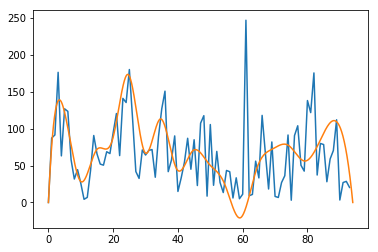

22 /data/junction/22/Se7en.1995.BDRip.AVC.mkv


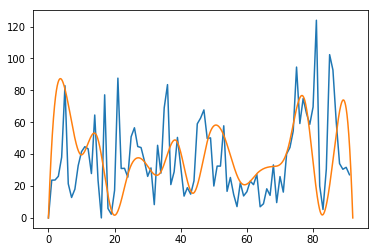

23 /data/junction/23/Molchanie.yagnyat.1991.BDRip.avi


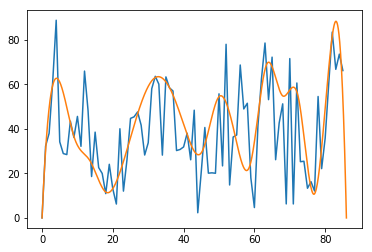

24 /data/junction/24/Eta_zamechatelnaya_zhizn_OPT.avi


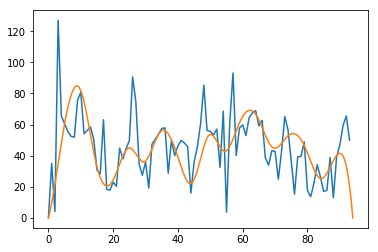

25 /data/junction/25/Zhizn.prekrasna.1997.BDRip.mkv


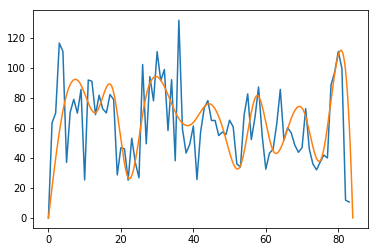

26 /data/junction/26/Podozritelnye_lica_1995_HDRip__[scarabey.org].avi


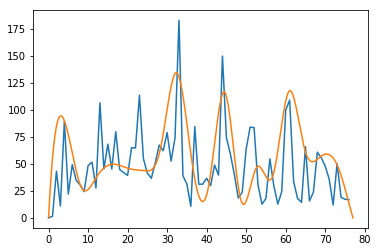

27 /data/junction/27/Leon_HDRip_dir_[scarabey.org].avi


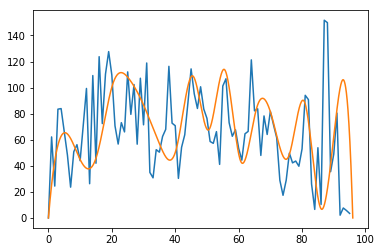

28 /data/junction/28/Saving.Private.Ryan.1998_HDRip_[scarabey.org].avi


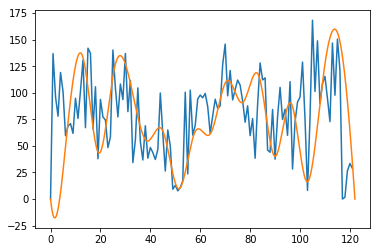

29 /data/junction/29/Spirited.Away.2001.HDTVRip-AVC.912x496.mkv


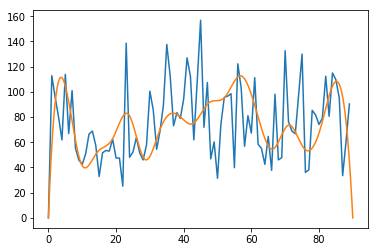

30 /data/junction/30/Amerikanskaya_istoriya_X_HDRip_[scarabey.org].avi


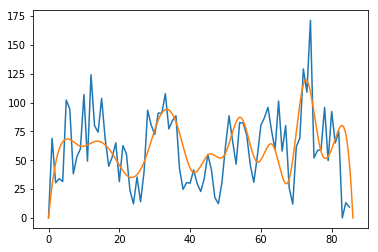

In [5]:
results_for_film = []

for idx, filepath in filepath_by_idx.items():
    print(idx, filepath)
    
    X = just_do_it_for_filepath(filepath)
    
    x_old = np.arange(len(X))
    x_new1 = np.linspace(0, len(X), 20)
    x_new2 = np.linspace(0, len(X), 4000)
    smooth = spline(x_old, X, x_new1)
    smooth = spline(x_new1, smooth, x_new2)
    
    results_for_film.append((idx, X, smooth, np.average(X)))

    plt.plot(X)
    plt.plot(x_new2, smooth)
    plt.show()

In [14]:
import json
results_for_film2 = [(idx, X.tolist(), smooth.tolist(), avgX) for idx, X, smooth, avgX in results_for_film]
with open('brightness 21-30.json', 'w') as f:
    f.write(json.dumps(results_for_film2))